# Exploratory Data Analysis on Full Dinosaur Dataset

##### by Sarah Schroeder, Elsie Wang, Caden Santiago, Katie Van Kirk

The goal of this notebook is to explore the data on the kaggle dataset: Jurassic Park - The Exhaustive Dinosaur Dataset https://www.kaggle.com/datasets/kjanjua/jurassic-park-the-exhaustive-dinosaur-dataset/data
Analysis was primarily done by finding "time span" which can be interpreted as the extimated time that the species existed based off of fossil record. Using optimization, we found the most ideal dinosaur of this time.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
dinosaurs = pd.read_csv('~/datahacks/datasets/dino.csv')

In [3]:
def extract_duration(row):
    """Takes period text and returns the time span"""
    pattern = r'(\d+)-(\d+)'
    match = re.search(pattern, row)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(2))
        return np.abs(end_year - start_year)
    else:
        return 

In [4]:
def extract_final(row):
    """Takes period text and returns the time span"""
    pattern = r'(\d+)-(\d+)'
    match = re.search(pattern, row)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(2))
        return end_year
    else:
        return 

In [5]:
def extract_length(length_str):
    if isinstance(length_str, str):
        numeric_part = re.findall(r'\d+\.\d+', length_str)
        if numeric_part:
            return float(numeric_part[0])  
    return None

In [6]:
# Create column extract time period
pattern = r'^\w+\s+(\w+)'
dinosaurs['time_period'] = dinosaurs['period'].str.extract(pattern)

# Create column extract time span
dinosaurs['time_span'] = dinosaurs['period'].apply(extract_duration)

# Create column and extract last known time years ago
dinosaurs['years_ago'] = dinosaurs['period'].apply(extract_final)

# turn length column to float values
dinosaurs['length'] = dinosaurs['length'].apply(extract_length)


# Drop NaN values
jurassic_cleaned = dinosaurs.dropna()

# change to countries
countries_continents = { 'Argentina': 'South America', 'Australia': 'Australia', 'Brazil': 'South America',
                        'Canada': 'North America', 'China': 'Asia', 'Egypt': 'Africa', 'France': 'Europe',
                        'Germany': 'Europe', 'India': 'Asia', 'Japan': 'Asia', 'Kazakhstan': 'Asia', 
                        'Lesotho': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mongolia': 'Asia',
                        'Morocco': 'Africa', 'Niger': 'Africa', 'North Africa': 'Africa', 'Romania': 'Europe', 
                        'Russia': 'Asia', 'South Africa': 'Africa', 'Spain': 'Europe', 'Tanzania': 'Africa', 
                        'Tunisia': 'Africa', 'USA': 'North America', 'United Kingdom': 'Europe',
                        'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Zimbabwe': 'Africa' } 

jurassic_cleaned['continent'] = jurassic_cleaned['lived_in'].replace(countries_continents)

# drop not needed columns
jurassic_cleaned = jurassic_cleaned.drop(['named_by', 'link', 'period'], axis = 1)
jurassic_cleaned.head(5)

,name,diet,lived_in,type,length,taxonomy,species,time_period,time_span,years_ago,continent
0,aardonyx,herbivorous,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Jurassic,10.0,189.0,Africa
1,abelisaurus,carnivorous,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Cretaceous,4.0,70.0,South America
2,achelousaurus,herbivorous,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Cretaceous,13.0,70.0,North America
3,achillobator,carnivorous,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Cretaceous,15.0,84.0,Asia
4,acrocanthosaurus,carnivorous,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Cretaceous,10.0,105.0,North America


# Distribution of Features Across All Time Periods

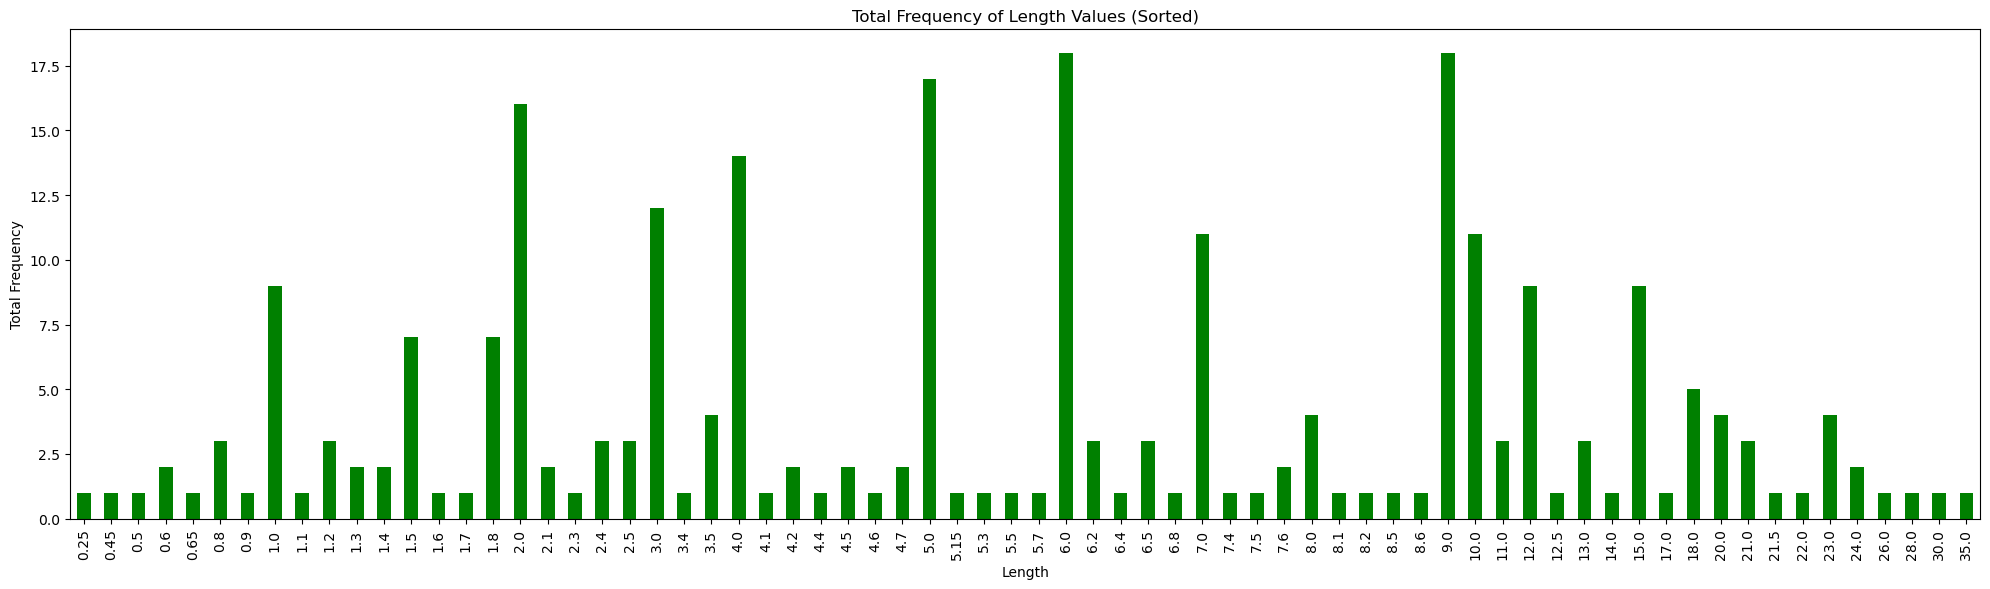

In [7]:
# show frequency of length values across all of the periods
length_counts = jurassic_cleaned['length'].value_counts()

length_counts_sorted = length_counts.sort_index(ascending=True)


plt.figure(figsize=(20, 6))
length_counts_sorted.plot(kind='bar', color='green')
plt.xlabel('Length')
plt.ylabel('Total Frequency')
plt.title('Total Frequency of Length Values (Sorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

9 meters and 6 meters are the most common but there are lots of outliers.

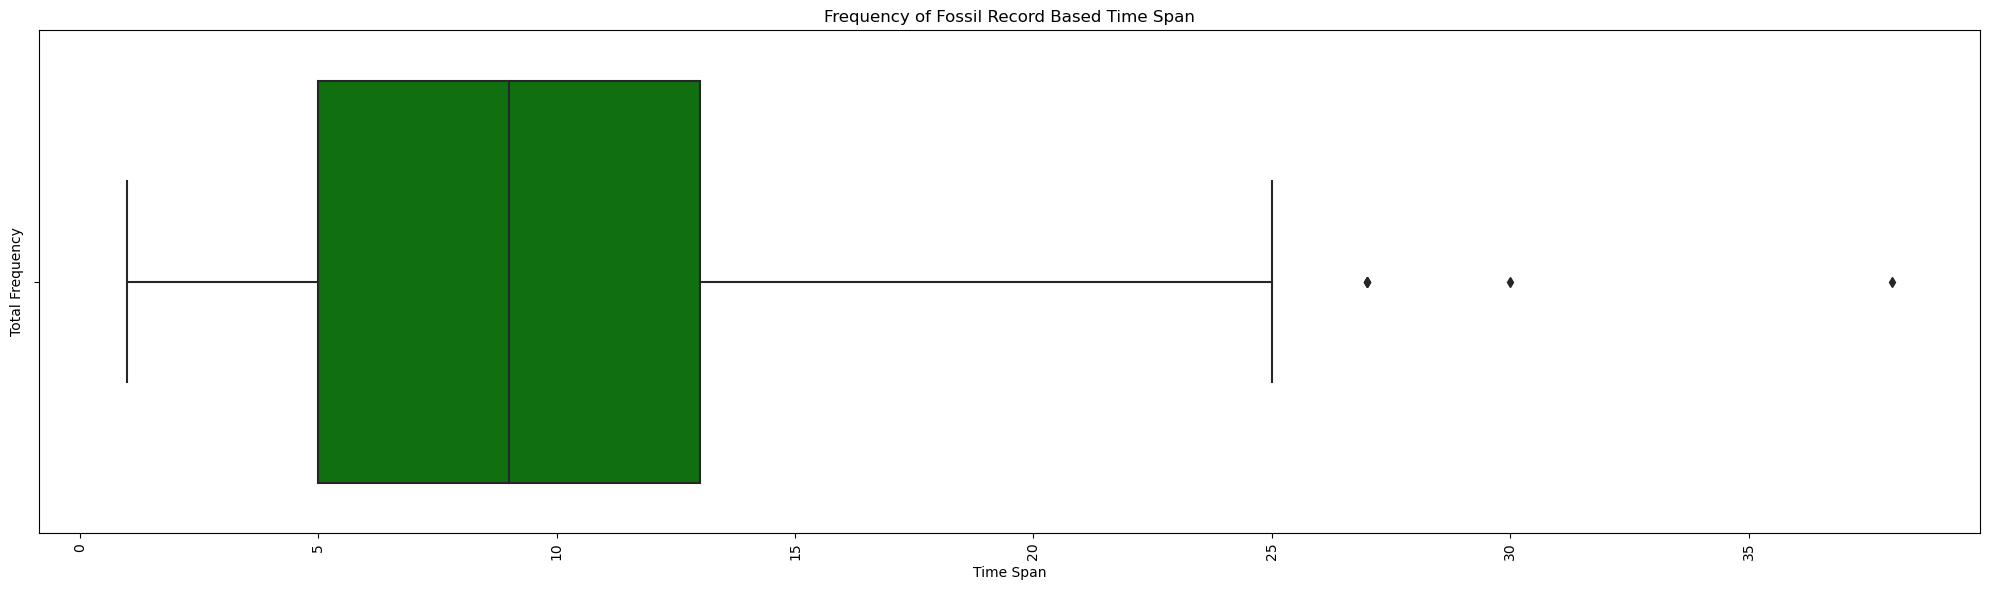

In [8]:
# show frequency of predicted time existed based on fossil record across all time periods
time_span_counts = jurassic_cleaned['time_span'].value_counts()

time_span_counts_sorted = time_span_counts.sort_index(ascending=True)


plt.figure(figsize=(20, 6))
sns.boxplot(x=jurassic_cleaned['time_span'], color='green')
plt.xlabel('Time Span')
plt.ylabel('Total Frequency')
plt.title('Frequency of Fossil Record Based Time Span')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most dinosaurs lived between 5 million years to 13 million years

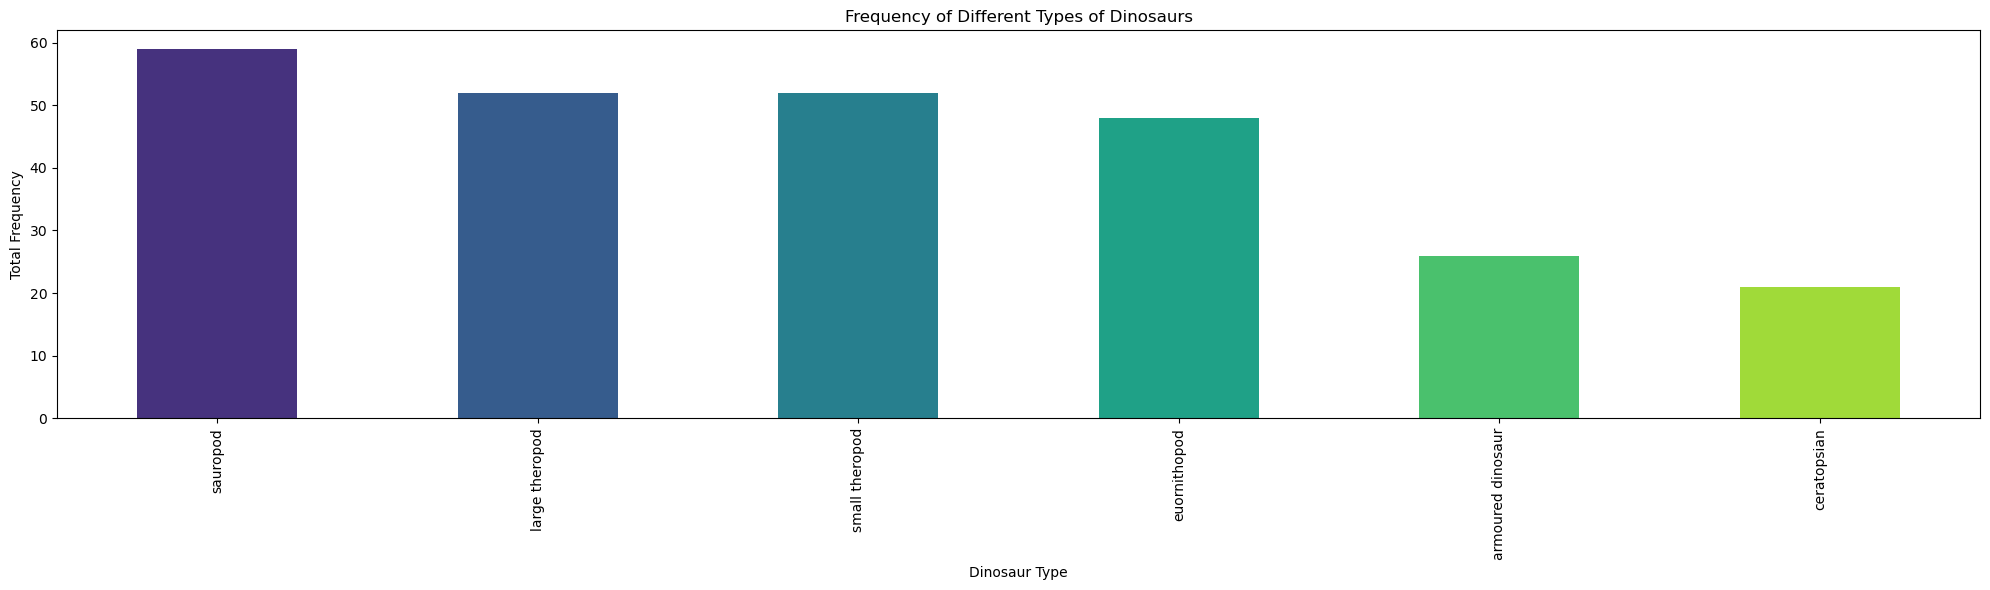

In [9]:
# show frequency of type of dinosaur across all time periods
dinosaur_type_counts = jurassic_cleaned['type'].value_counts()

palette = sns.color_palette("viridis", len(dinosaur_type_counts))

plt.figure(figsize=(20, 6))
dinosaur_type_counts.plot(kind='bar', color=palette)
plt.xlabel('Dinosaur Type')
plt.ylabel('Total Frequency')
plt.title('Frequency of Different Types of Dinosaurs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most Dinosaurs are Sauropods.

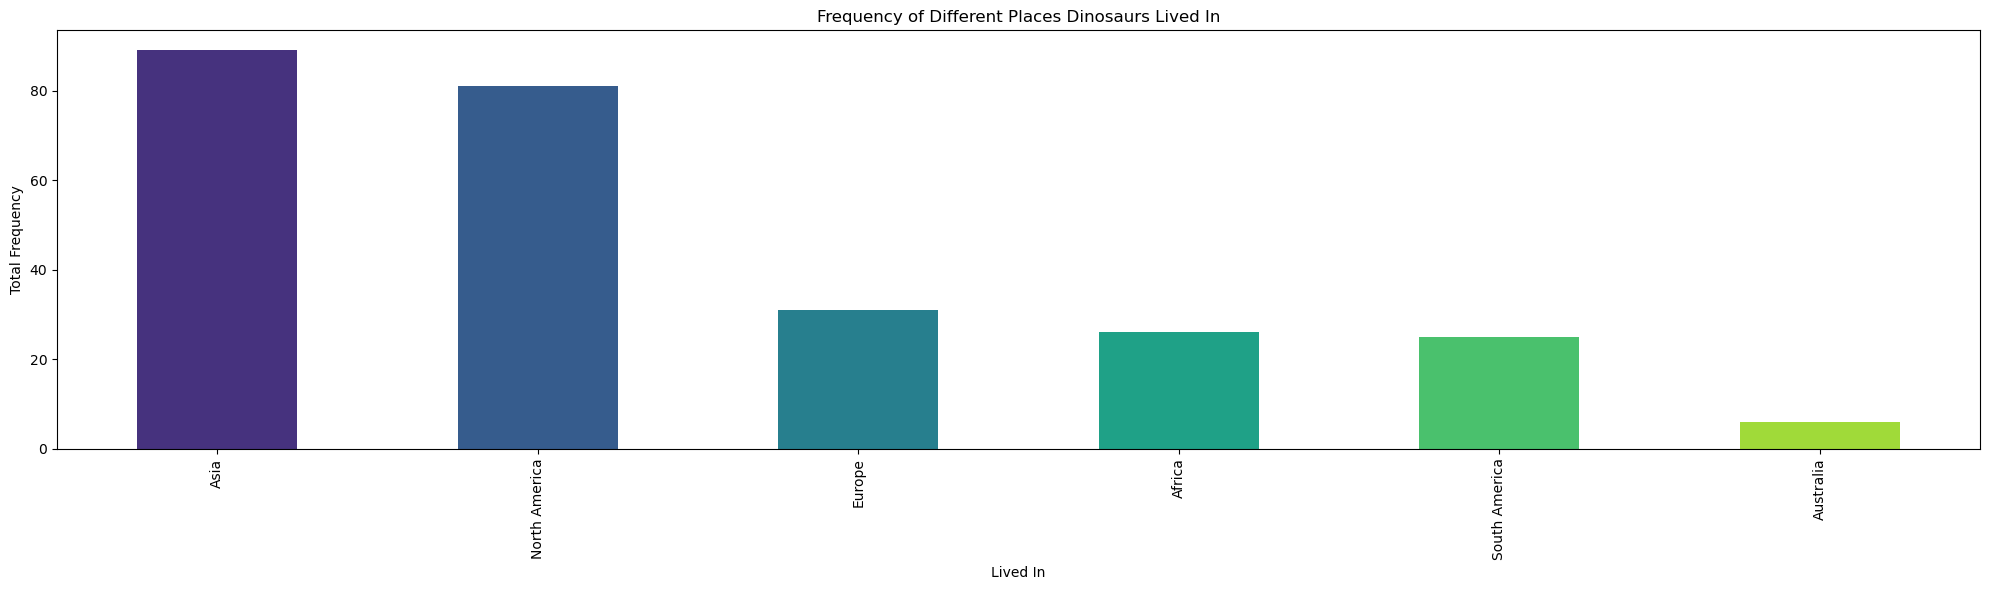

In [10]:
# determine most prominent countries in which fossils were found
lived_in_counts = jurassic_cleaned['continent'].value_counts()

palette = sns.color_palette("viridis", len(dinosaur_type_counts))

plt.figure(figsize=(20, 6))
lived_in_counts.plot(kind='bar', color=palette)
plt.xlabel('Lived In')
plt.ylabel('Total Frequency')
plt.title('Frequency of Different Places Dinosaurs Lived In')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The fossils found were mostly in Asia implying most dinosaurs were also in those locations.

## Compare by Time Period

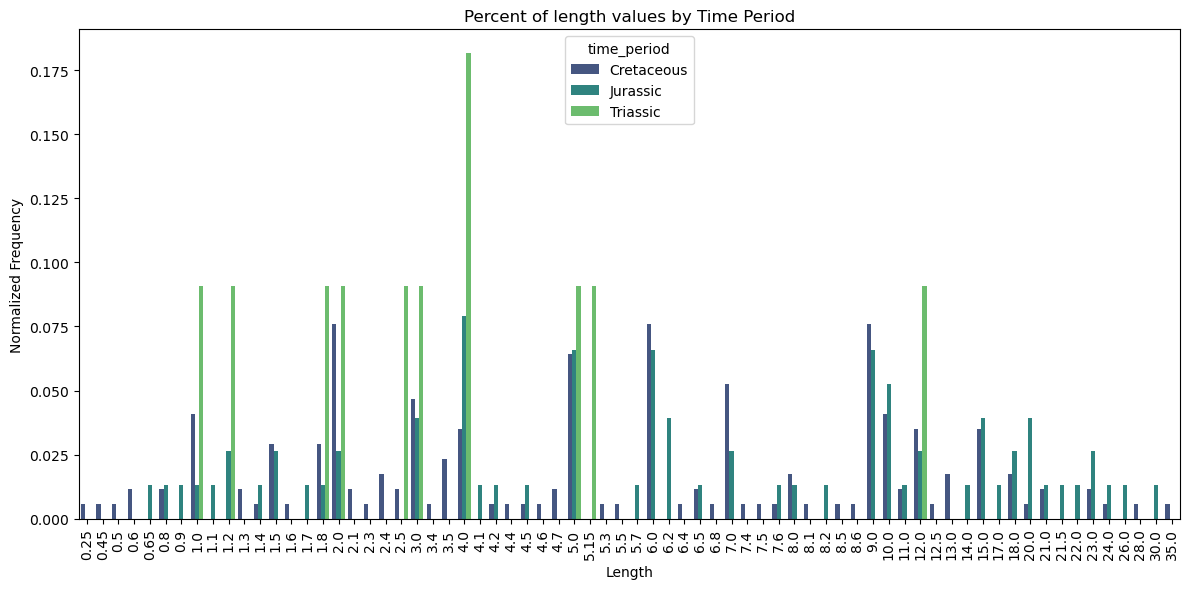

In [11]:
# groupby time period and find lengths
frequency_by_time_period = jurassic_cleaned.groupby(['time_period', 'length']).size().reset_index(name='frequency')

# Calculate total count of values in each time period
total_counts = jurassic_cleaned.groupby('time_period').size()

# find percent of each length count in each time period
frequency_by_time_period['normalized_frequency'] = frequency_by_time_period['frequency'] / frequency_by_time_period['time_period'].map(total_counts)

custom_palette = sns.color_palette("viridis", len(frequency_by_time_period['time_period'].unique()))

plt.figure(figsize=(12, 6))
sns.barplot(x='length', y='normalized_frequency', hue='time_period', data=frequency_by_time_period, palette=custom_palette)
plt.xlabel('Length')
plt.ylabel('Normalized Frequency')
plt.title('Percent of length values by Time Period')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

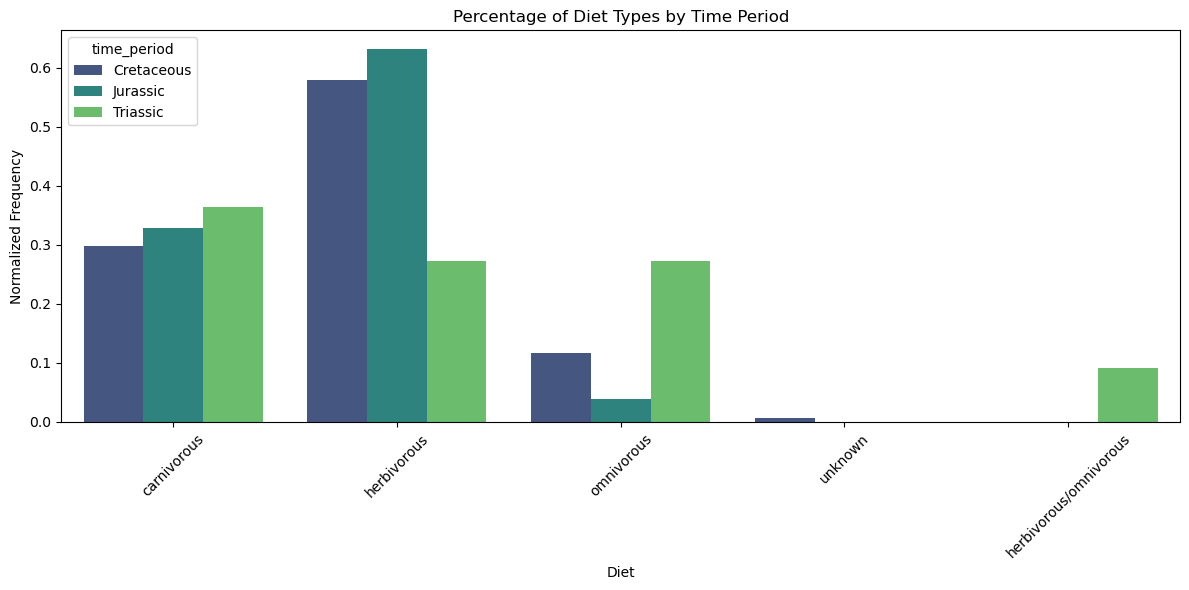

In [12]:
# groupby time period and find diets
frequency_by_time_period_diet = jurassic_cleaned.groupby(['time_period', 'diet']).size().reset_index(name='frequency')

# Calculate total count of values in each time period
total_counts_diet = jurassic_cleaned.groupby('time_period').size()

# Normalize frequency by dividing by total count of values in each time period
frequency_by_time_period_diet['normalized_frequency'] = frequency_by_time_period_diet['frequency'] / frequency_by_time_period_diet['time_period'].map(total_counts_diet)

# Define custom color palette
custom_palette_diet = sns.color_palette("viridis", len(frequency_by_time_period_diet['time_period'].unique()))

# Plot
plt.figure(figsize=(12, 6))  # Adjusted figure size
sns.barplot(x='diet', y='normalized_frequency', hue='time_period', data=frequency_by_time_period_diet, palette=custom_palette_diet)
plt.xlabel('Diet')
plt.ylabel('Normalized Frequency')
plt.title('Percentage of Diet Types by Time Period')
plt.xticks(rotation=45)  # Adjusted rotation of x-axis labels
plt.tight_layout()
plt.show()

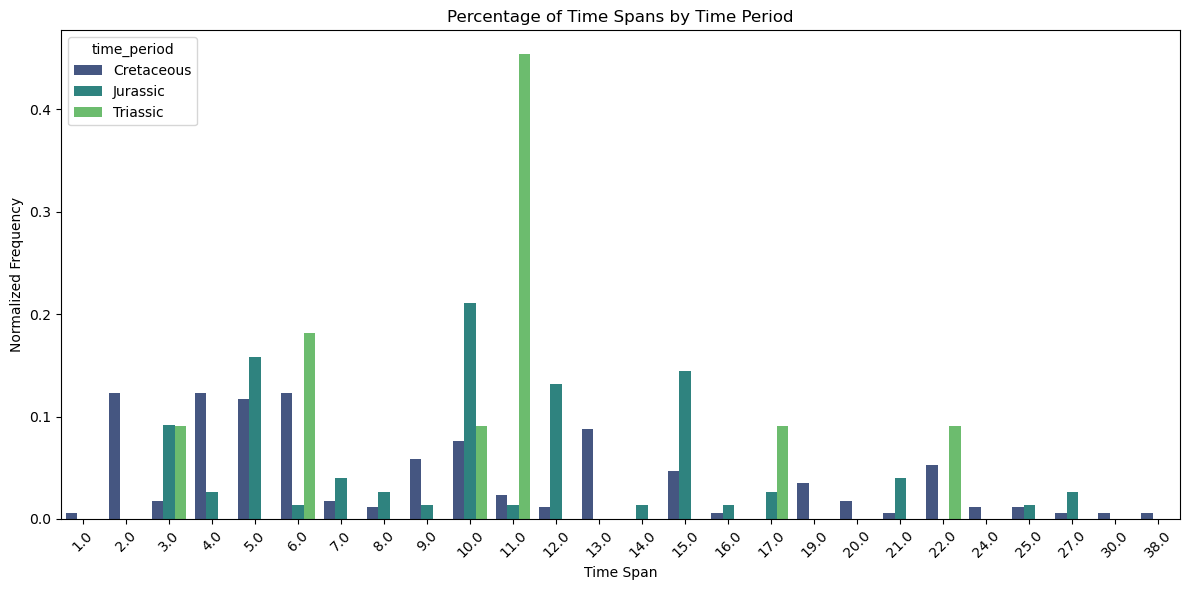

In [13]:
# groupby time period and find time spans
frequency_by_time_period_span = jurassic_cleaned.groupby(['time_period', 'time_span']).size().reset_index(name='frequency')

total_counts_span = jurassic_cleaned.groupby('time_period').size()

frequency_by_time_period_span['normalized_frequency'] = frequency_by_time_period_span['frequency'] / frequency_by_time_period_span['time_period'].map(total_counts_span)

custom_palette_span = sns.color_palette("viridis", len(frequency_by_time_period_diet['time_period'].unique()))

# Plot
plt.figure(figsize=(12, 6))  # Adjusted figure size
sns.barplot(x='time_span', y='normalized_frequency', hue='time_period', data=frequency_by_time_period_span, palette=custom_palette_span)
plt.xlabel('Time Span')
plt.ylabel('Normalized Frequency')
plt.title('Percentage of Time Spans by Time Period')
plt.xticks(rotation=45)  # Adjusted rotation of x-axis labels
plt.tight_layout()
plt.show()

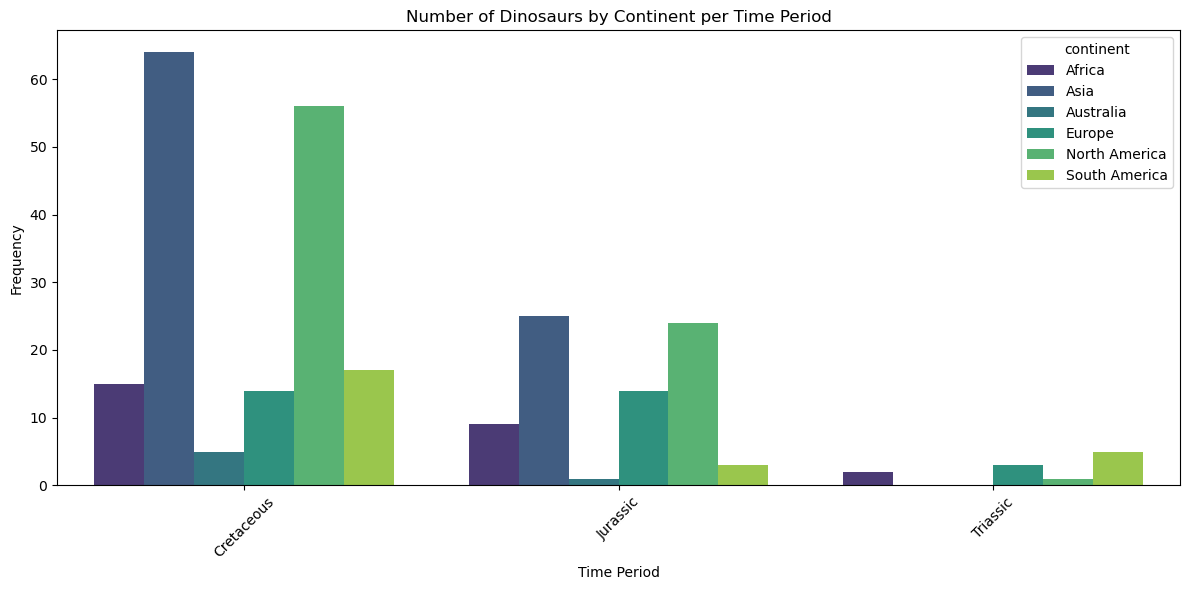

In [14]:
# groupby time period and find continents
frequency_by_continent_span = jurassic_cleaned.groupby(['continent', 'time_period']).size().reset_index(name='frequency')

custom_palette_span = sns.color_palette('viridis', len(frequency_by_continent_span['continent'].unique()))

plt.figure(figsize=(12, 6))
sns.barplot(x='time_period', y='frequency', hue='continent', data=frequency_by_continent_span, palette=custom_palette_span)
plt.xlabel('Time Period')
plt.ylabel('Frequency')
plt.title('Number of Dinosaurs by Continent per Time Period')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

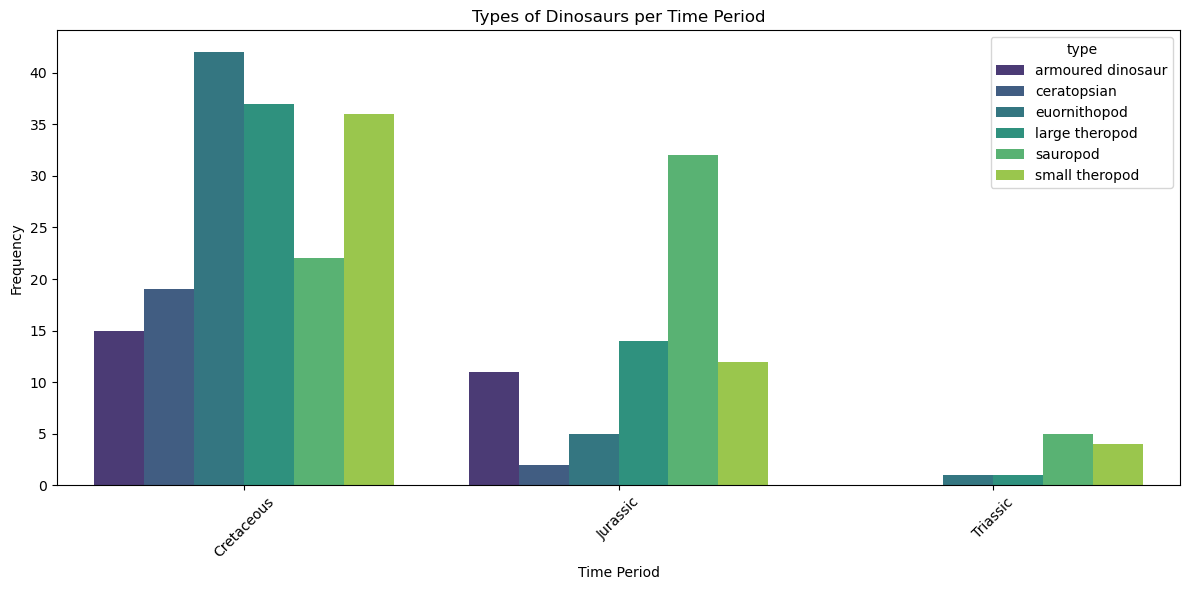

In [15]:
# groupby time period and find dinosaur types
frequency_by_continent_span = jurassic_cleaned.groupby(['type', 'time_period']).size().reset_index(name='frequency')

custom_palette_span = sns.color_palette('viridis', len(frequency_by_continent_span['type'].unique()))

plt.figure(figsize=(12, 6))
sns.barplot(x='time_period', y='frequency', hue='type', data=frequency_by_continent_span, palette=custom_palette_span)
plt.xlabel('Time Period')
plt.ylabel('Frequency')
plt.title('Types of Dinosaurs per Time Period')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis of Top 3 time Spans in each period and their features

In [16]:
# split dataframes by time period and find dinosaurs corresponding to the top 3 time span values per time period
def filter_top_time_spans(df, time_period, n=3, numerical_column='time_span'):

    filtered_df = df[df['time_period'] == time_period]
    sorted_df = filtered_df.sort_values(by=numerical_column, ascending=False)
    unique_time_spans = sorted_df['time_span'].unique()[:n]
    return sorted_df[sorted_df['time_span'].isin(unique_time_spans)]

top_time_spans_triassic = filter_top_time_spans(jurassic_cleaned, 'Triassic', 3)
top_time_spans_jurassic = filter_top_time_spans(jurassic_cleaned, 'Jurassic', 3)
top_time_spans_cretaceous = filter_top_time_spans(jurassic_cleaned, 'Cretaceous', 3)
all_top_time_spans = pd.concat([top_time_spans_triassic, top_time_spans_jurassic, top_time_spans_cretaceous])

In [17]:
all_top_time_spans.head(5)

,name,diet,lived_in,type,length,taxonomy,species,time_period,time_span,years_ago,continent
280,thecodontosaurus,omnivorous,United Kingdom,sauropod,2.5,Dinosauria Saurischia Sauropodomorpha Prosauro...,antiquus,Triassic,22.0,205.0,Europe
63,chindesaurus,carnivorous,USA,small theropod,4.0,Dinosauria Saurischia Theropoda Herrerasauridae,bryansmalli,Triassic,17.0,210.0,North America
71,coloradisaurus,omnivorous,Argentina,sauropod,4.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,brevis,Triassic,11.0,210.0,South America
122,guaibasaurus,herbivorous,Brazil,small theropod,1.8,Dinosauria Saurischia Theropoda,candelariensis,Triassic,11.0,210.0,South America
183,mussaurus,herbivorous,Argentina,sauropod,3.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,patagonicus,Triassic,11.0,210.0,South America


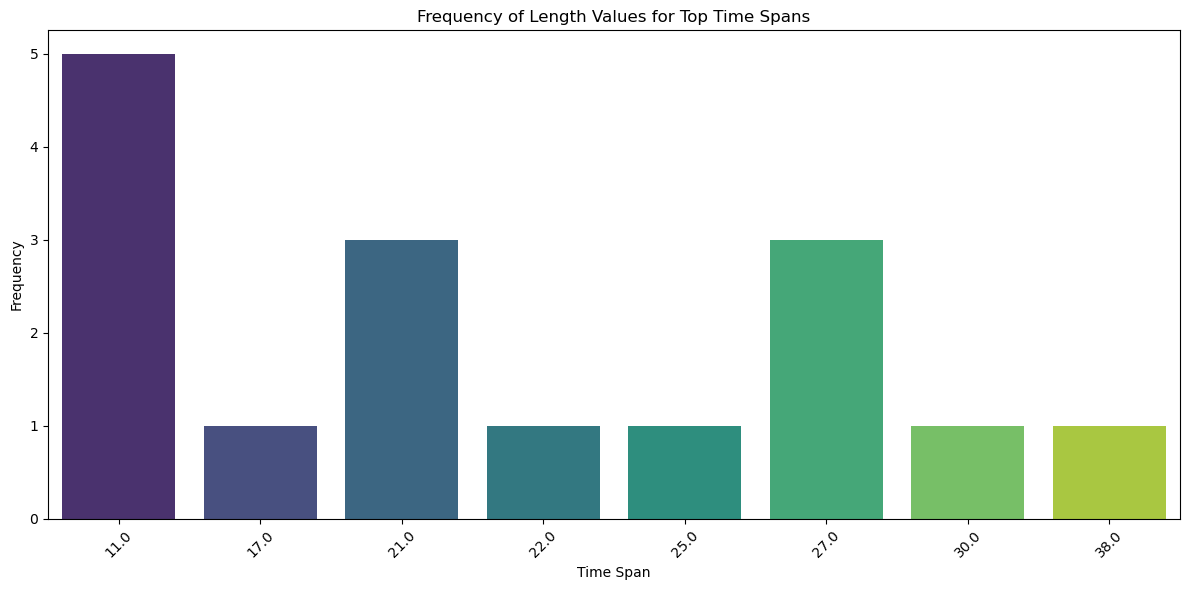

In [18]:
# plot the frequency of length values amongst the top time spans
plt.figure(figsize=(12, 6))
sns.countplot(x='time_span', data=all_top_time_spans, palette='viridis')
plt.xlabel('Time Span')
plt.ylabel('Frequency')
plt.title('Frequency of Length Values for Top Time Spans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

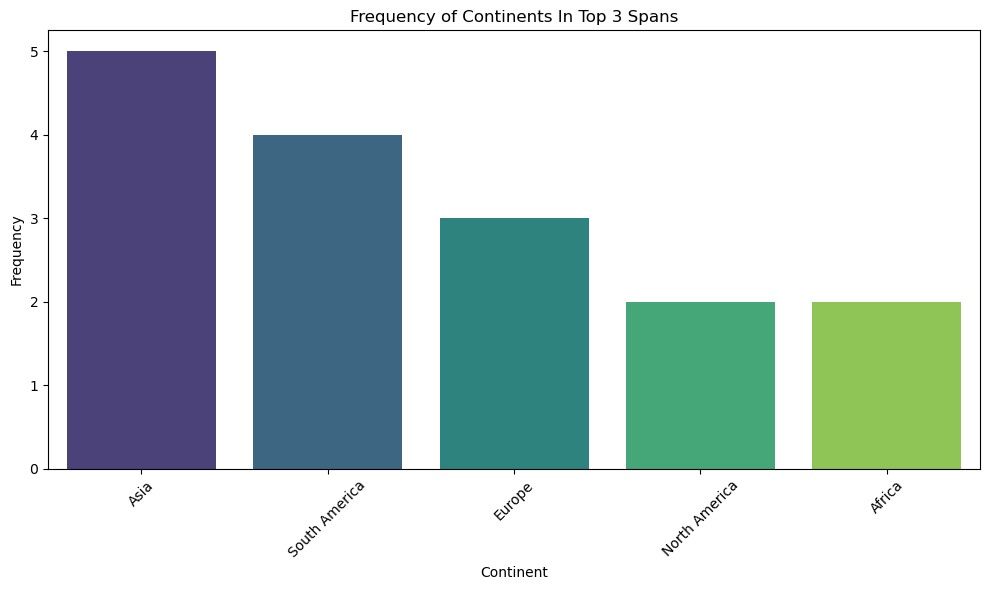

In [19]:
# plot the frequency of continents amongst the top time spans
continent_frequency = all_top_time_spans['continent'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_frequency.index, y=continent_frequency.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Continents In Top 3 Spans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

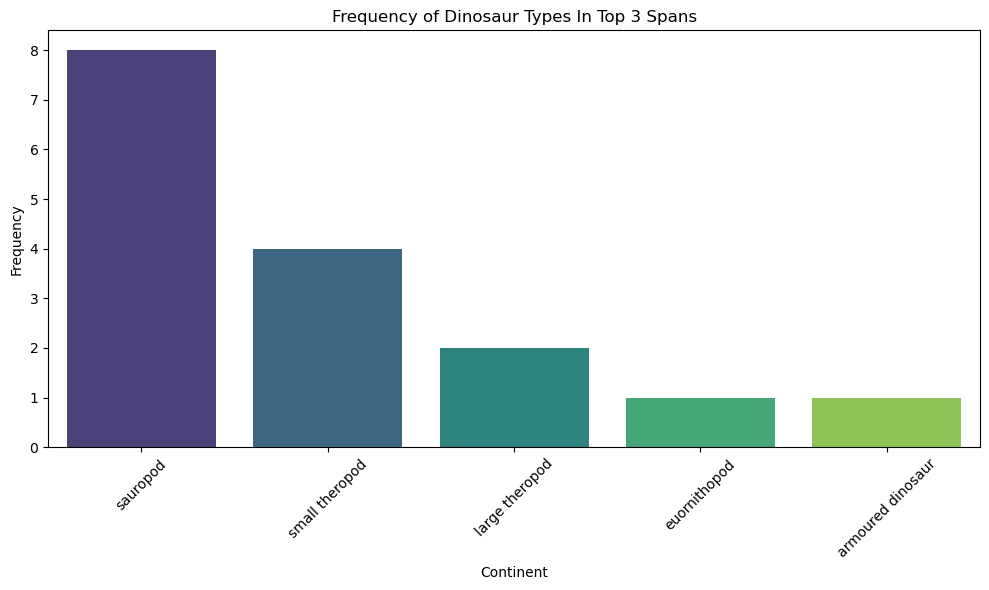

In [20]:
# plot the frequency of dinosaur types amongst the top time spans
continent_frequency = all_top_time_spans['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_frequency.index, y=continent_frequency.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Dinosaur Types In Top 3 Spans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

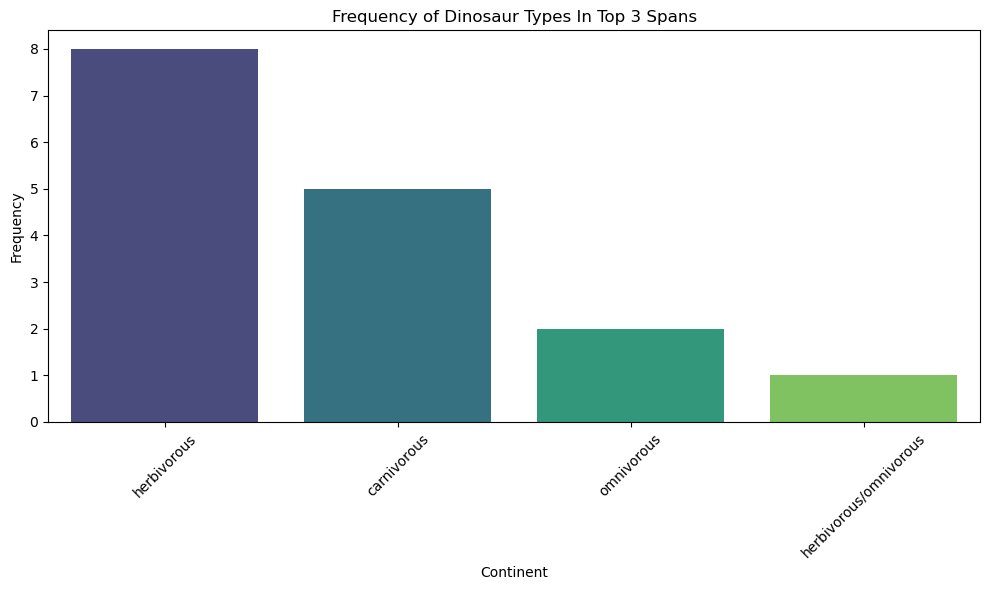

In [21]:
# plot the frequency of diets amongst the top time spans
continent_frequency = all_top_time_spans['diet'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_frequency.index, y=continent_frequency.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Dinosaur Types In Top 3 Spans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

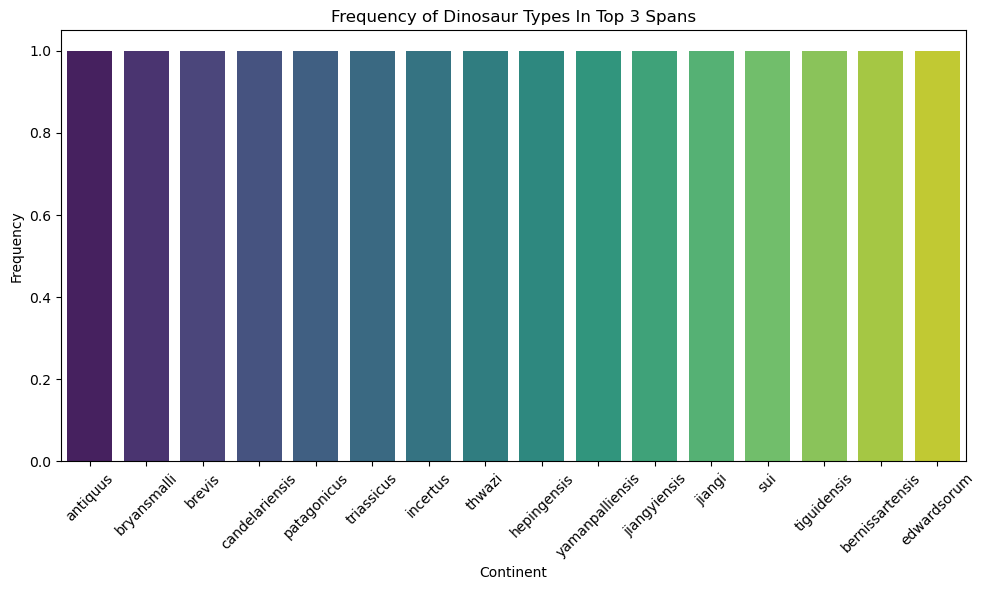

In [22]:
# plot the frequency of diets amongst the top time spans
continent_frequency = all_top_time_spans['species'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_frequency.index, y=continent_frequency.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Dinosaur Types In Top 3 Spans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

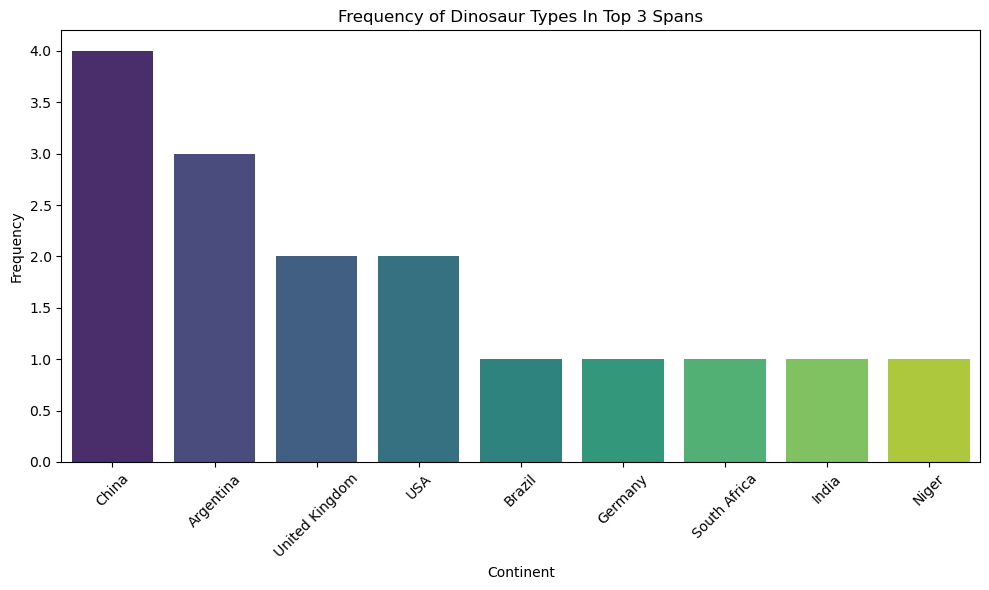

In [23]:
continent_frequency = all_top_time_spans['lived_in'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_frequency.index, y=continent_frequency.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Dinosaur Types In Top 3 Spans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Taxonomy Analysis on Top 3 in each Period

In [24]:
# convert taxonomy values into list
all_top_time_spans['taxonomy'] = all_top_time_spans['taxonomy'].str.split(' ')
all_entries = [entry for sublist in all_top_time_spans['taxonomy'] for entry in sublist]

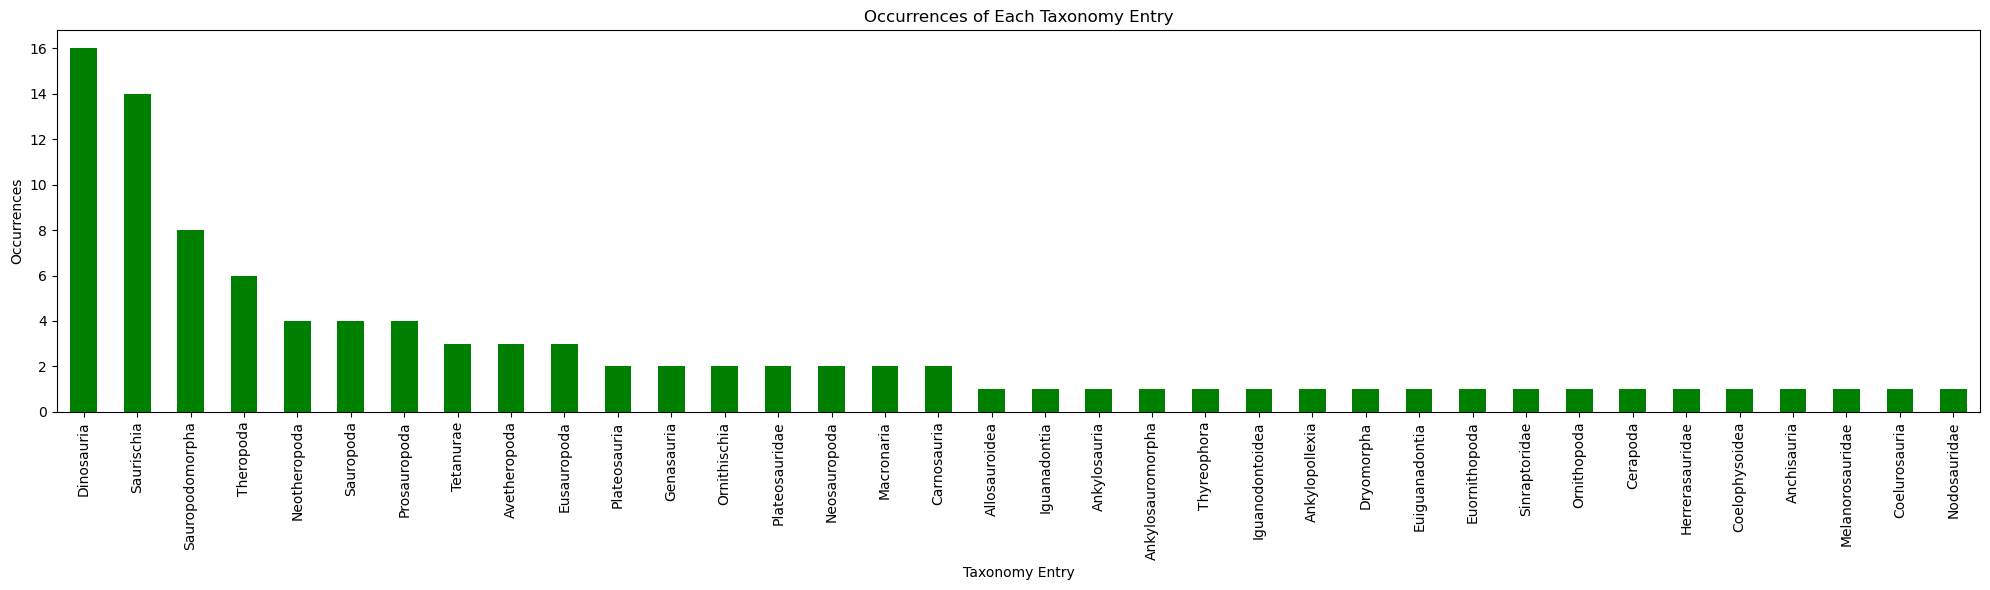

In [25]:
# plot frequency of taxonomy values
entry_counts = pd.Series(all_entries).value_counts()

plt.figure(figsize=(20, 6))
entry_counts.plot(kind='bar', color='green')
plt.xlabel('Taxonomy Entry')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each Taxonomy Entry')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Based on all of our data, we can say the ideal morph dinosaur is an Asian sauropod that is 11m and is an herbivore. Their taxonomy would likely be Dinosauria Saurischia Sauropodomorpha Sauropoda Eusauropoda. This taxonomy was chosen by going through the most common taxonomy values and selecting the first one in their hierarchal category that would fall under sauropod. Based on research, a Dinosauria Saurischia Sauropodomorpha Sauropoda Eusauropoda would have a "lizard hip", long neck, small head, columnar limbs, long tail, and thick body. They typically had relatively small forelimbs compared to their massive bodies with simple clawed digits. As they were not high predators, they would likely come in a neutral color pallete. They would have likely lived in the area of what is now China. This is a possible dinosaur to exist although it may not specifically exist. We have named it Verdantosaurus.